<a href="https://colab.research.google.com/github/MUHOOZId/Android-UI-Tutorials/blob/master/Malware_Analysis_Project_A0BMR9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Step 1: Loading malware feature dataset...
✅ Loaded 10039 samples

🔹 Step 2: Handling missing values...
🔹 Step 3: Encoding categorical columns...
  • Encoding column: EntryHash10
  • Encoding column: EntryHash20
  • Encoding column: EntryHash30
  • Encoding column: EntryHash40
  • Encoding column: Characteristics
  • Encoding column: IsDLL
  • Encoding column: LARGE_ADDRESS_AWARE
  • Encoding column: OS_Version
  • Encoding column: Subsystem
  • Encoding column: Machine
  • Encoding column: SizeOfCode
  • Encoding column: InitializedData
  • Encoding column: SizeOfHeapReserve
  • Encoding column: SizeOfStackReserve
  • Encoding column: NumberOfResources
  • Encoding column: NumberOfSections
  • Encoding column: NumberOfImportedFunctions
  • Encoding column: Imphash
  • Encoding column: SignatureSubject
  • Encoding column: SignatureIssuer
  • Encoding column: SignatureAlgorithm
  • Encoding column: SectionName_0
  • Encoding column: SectionVA_0
  • Encoding column: SectionVSIZE_0
  •

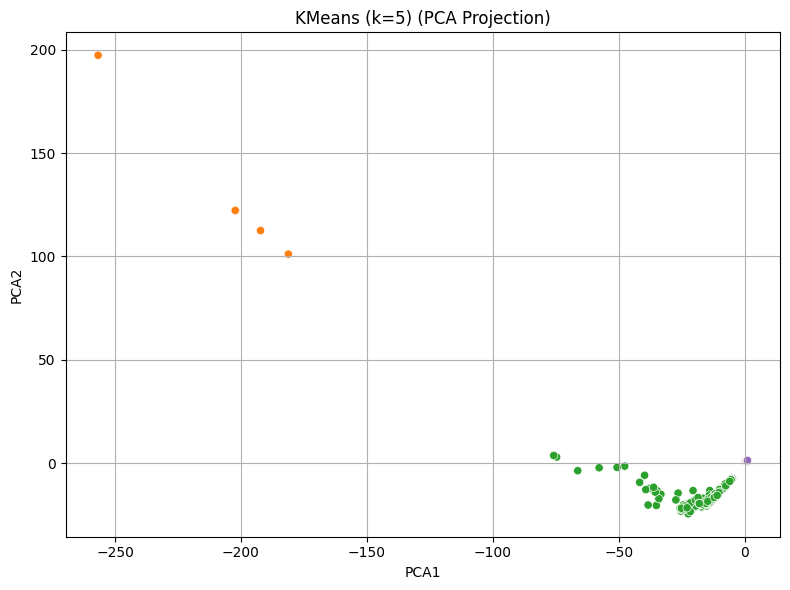

▶ Running DBSCAN...
✅ DBSCAN → Silhouette Score: 0.3693



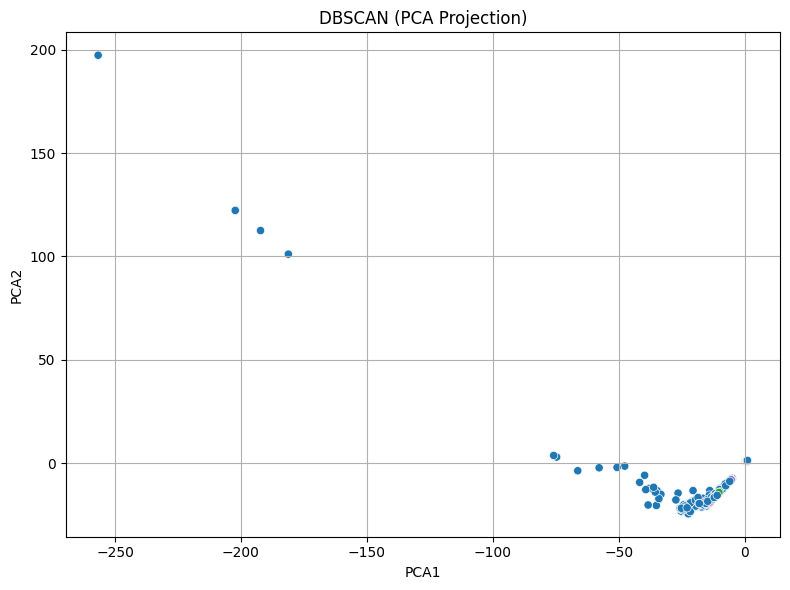

▶ Running Agglomerative...
✅ Agglomerative → Silhouette Score: 0.7386



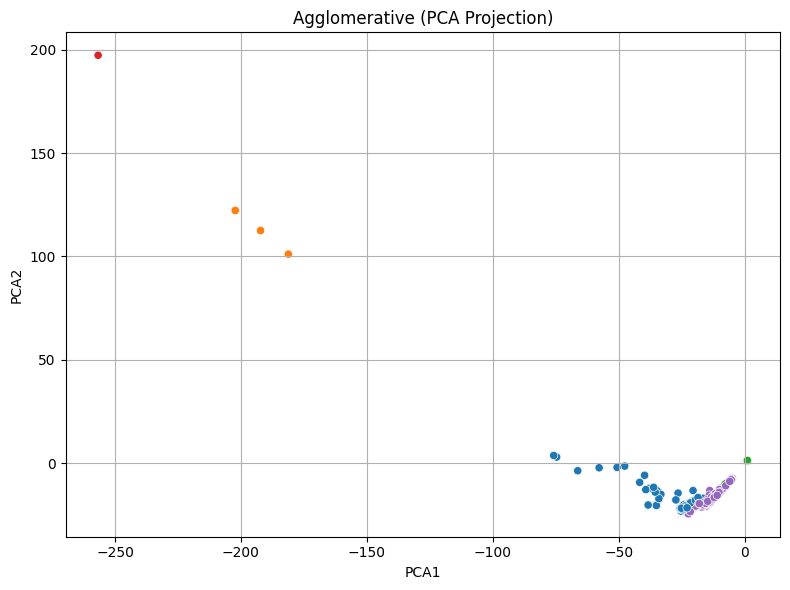

📊 Final Clustering Comparison:
KMeans (k=5)              → Silhouette Score: 0.2397
DBSCAN                    → Silhouette Score: 0.3693
Agglomerative             → Silhouette Score: 0.7386


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
print("🔹 Step 1: Loading malware feature dataset...")
df = pd.read_csv("malware_features_datasetq.csv", low_memory=False)
df["filename"] = df["filename"].str.replace(".txt", "", regex=False)
print(f"✅ Loaded {len(df)} samples\n")

# Step 2: Drop unused identifier columns
X = df.drop(columns=["filename", "source"], errors="ignore")

# Step 3: Fill missing values
print("🔹 Step 2: Handling missing values...")
# Fill numeric NaNs with 0, strings with "unknown"
X = X.fillna("unknown")

# Step 4: Convert mixed-type object columns to string and encode
print("🔹 Step 3: Encoding categorical columns...")
for col in X.select_dtypes(include=["object"]).columns:
    print(f"  • Encoding column: {col}")
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

# Step 5: Standardize features
print("🔹 Step 4: Scaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Reduce dimensions for visualization
print("🔹 Step 5: Reducing dimensions with PCA for plotting...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 7: Define clustering models
print("🔹 Step 6: Running clustering models...\n")
models = {
    "KMeans (k=5)": KMeans(n_clusters=5, random_state=42),
    "DBSCAN": DBSCAN(eps=2.0, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=5)
}

results = {}

for name, model in models.items():
    print(f"▶ Running {name}...")
    clusters = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters) if len(set(clusters)) > 1 else -1
    results[name] = {"labels": clusters, "score": score}
    print(f"✅ {name} → Silhouette Score: {score:.4f}\n")

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.title(f"{name} (PCA Projection)")
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="tab10", legend=None)
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 8: Compare all clustering results
print("📊 Final Clustering Comparison:")
for name, res in results.items():
    print(f"{name:25s} → Silhouette Score: {res['score']:.4f}")


🔹 Step 1: Loading labeled features and labels...
✅ Found 2484 labeled feature samples

🔹 Step 2: Encoding categorical columns...
  • Encoding: EntryHash10
  • Encoding: EntryHash20
  • Encoding: EntryHash30
  • Encoding: EntryHash40
  • Encoding: Characteristics
  • Encoding: IsDLL
  • Encoding: LARGE_ADDRESS_AWARE
  • Encoding: OS_Version
  • Encoding: Subsystem
  • Encoding: Machine
  • Encoding: SizeOfCode
  • Encoding: InitializedData
  • Encoding: SizeOfHeapReserve
  • Encoding: SizeOfStackReserve
  • Encoding: NumberOfResources
  • Encoding: NumberOfSections
  • Encoding: NumberOfImportedFunctions
  • Encoding: Imphash
  • Encoding: SignatureSubject
  • Encoding: SignatureIssuer
  • Encoding: SignatureAlgorithm
  • Encoding: SectionName_0
  • Encoding: SectionVA_0
  • Encoding: SectionVSIZE_0
  • Encoding: SectionRawSize_0
  • Encoding: SectionCharacteristics_0
  • Encoding: SectionName_1
  • Encoding: SectionVA_1
  • Encoding: SectionVSIZE_1
  • Encoding: SectionRawSize_1
  • En

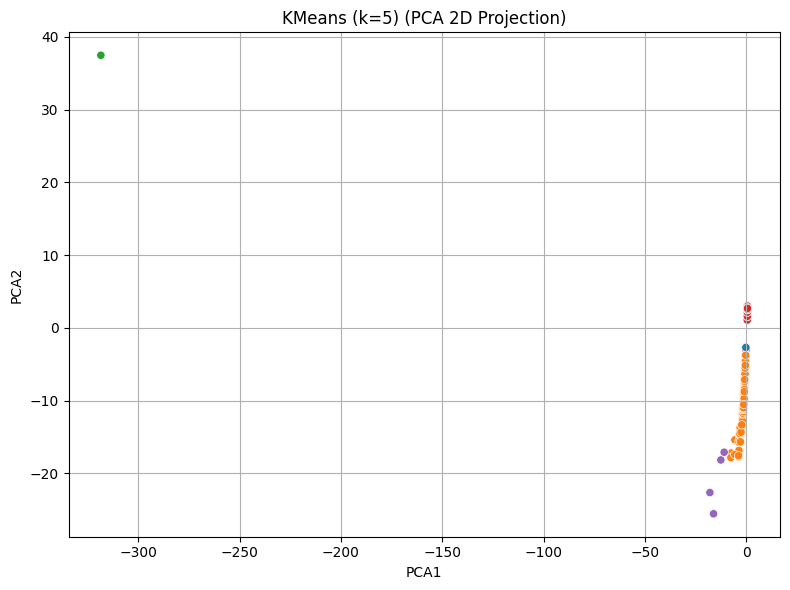

▶ Running DBSCAN...
✅ DBSCAN → Silhouette Score: -0.1338



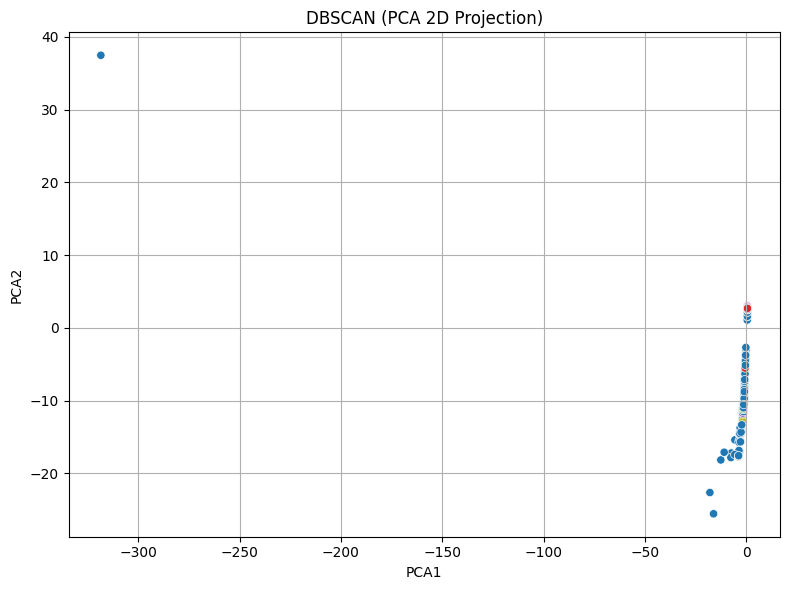

▶ Running Agglomerative...
✅ Agglomerative → Silhouette Score: 0.5405



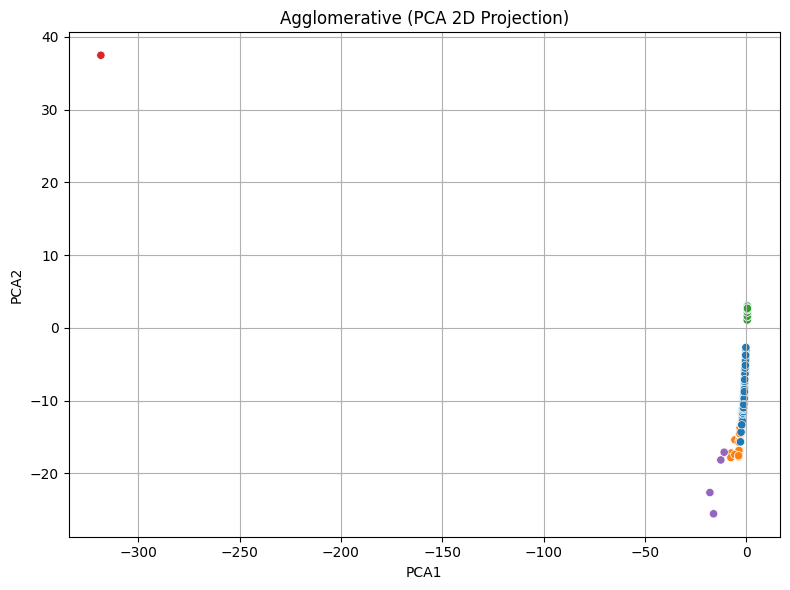


🔹 Step 5: Evaluating clusters using real family names...
🔸 Cluster 0:
  • Total samples: 158
  • Top family: CoinMiner (85)
  • Purity: 0.54

🔸 Cluster 1:
  • Total samples: 516
  • Top family: Adware (168)
  • Purity: 0.33

🔸 Cluster 2:
  • Total samples: 1
  • Top family: unknown (1)
  • Purity: 1.00

🔸 Cluster 3:
  • Total samples: 1804
  • Top family: Kryptik (226)
  • Purity: 0.13

🔸 Cluster 4:
  • Total samples: 5
  • Top family: Toolbar (2)
  • Purity: 0.40

📊 Cluster Evaluation Summary:
 Cluster  Samples TopFamily  Purity
       0      158 CoinMiner    0.54
       1      516    Adware    0.33
       2        1   unknown    1.00
       3     1804   Kryptik    0.13
       4        5   Toolbar    0.40


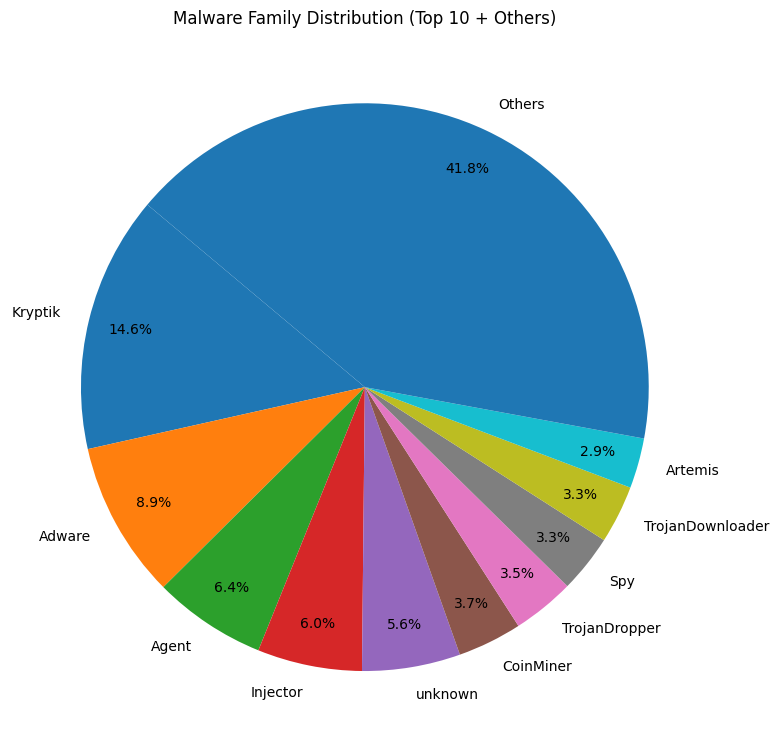

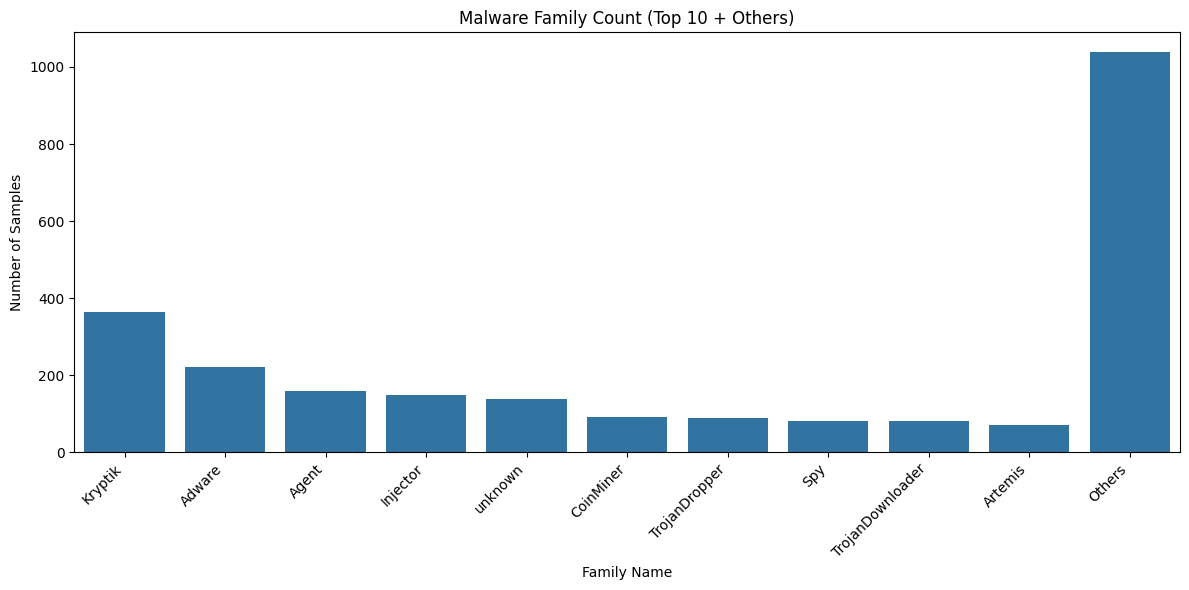

📁 Exported pie chart to: pie_family_dist.png
📁 Exported bar chart to: bar_family_dist.png


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the datasets
print("🔹 Step 1: Loading labeled features and labels...")

features_df = pd.read_csv("malware_features_datasetq.csv", low_memory=False)
features_df["filename"] = features_df["filename"].astype(str).str.replace(".txt", "", regex=False)

labels_df = pd.read_csv("family_labels.csv")
labels_df["filename"] = labels_df["filename"].astype(str).str.strip()

# Step 2: Filter features to labeled samples only
filtered_df = pd.merge(features_df, labels_df, on="filename", how="inner")
print(f"✅ Found {len(filtered_df)} labeled feature samples\n")

# Step 3: Drop unnecessary columns
X = filtered_df.drop(columns=["filename", "source", "family_name", "source_av"], errors="ignore")

# Step 4: Handle missing values
X = X.fillna("unknown")

# Step 5: Encode categorical columns
print("🔹 Step 2: Encoding categorical columns...")
for col in X.select_dtypes(include=["object"]).columns:
    print(f"  • Encoding: {col}")
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

# Step 6: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Reduce dimensions for visualization
print("🔹 Step 3: PCA for plotting...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 8: Run clustering models
print("🔹 Step 4: Running clustering models...\n")
models = {
    "KMeans (k=5)": KMeans(n_clusters=5, random_state=42),
    "DBSCAN": DBSCAN(eps=2.0, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=5)
}

results = {}

for name, model in models.items():
    print(f"▶ Running {name}...")
    clusters = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters) if len(set(clusters)) > 1 else -1
    results[name] = {
        "labels": clusters,
        "score": score
    }
    print(f"✅ {name} → Silhouette Score: {score:.4f}\n")

    # Plot clusters
    plt.figure(figsize=(8, 6))
    plt.title(f"{name} (PCA 2D Projection)")
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="tab10", legend=False)
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Step 9: Evaluate clusters using true labels
print("\n🔹 Step 5: Evaluating clusters using real family names...")

eval_df = filtered_df[["filename", "family_name"]].copy()
eval_df["cluster"] = results["KMeans (k=5)"]["labels"]  # Use KMeans for evaluation

# Per-cluster purity evaluation
cluster_stats = []
for cluster_id in sorted(eval_df["cluster"].unique()):
    subset = eval_df[eval_df["cluster"] == cluster_id]
    count = len(subset)
    top_family = subset["family_name"].value_counts().idxmax()
    top_count = subset["family_name"].value_counts().max()
    purity = top_count / count if count > 0 else 0

    print(f"🔸 Cluster {cluster_id}:")
    print(f"  • Total samples: {count}")
    print(f"  • Top family: {top_family} ({top_count})")
    print(f"  • Purity: {purity:.2f}\n")

    cluster_stats.append({
        "Cluster": cluster_id,
        "Samples": count,
        "TopFamily": top_family,
        "Purity": round(purity, 2)
    })

# Summary table
summary_df = pd.DataFrame(cluster_stats)
print("📊 Cluster Evaluation Summary:")
print(summary_df.to_string(index=False))

# Step 10: Visualize malware family distribution

# Count total families
family_counts = filtered_df["family_name"].value_counts()

# Limit to top 10
top_families = family_counts.nlargest(10)
others_count = family_counts.iloc[10:].sum()

# Combine into one Series with 'Others'
combined_counts = top_families.copy()
combined_counts["Others"] = others_count

# ✅ Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    combined_counts, labels=combined_counts.index,
    autopct='%1.1f%%', startangle=140, pctdistance=0.85
)
plt.title("Malware Family Distribution (Top 10 + Others)")
plt.tight_layout()
plt.savefig("pie_family_dist.png")
plt.show()

# ✅ Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=combined_counts.index, y=combined_counts.values)
plt.title("Malware Family Count (Top 10 + Others)")
plt.xlabel("Family Name")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("bar_family_dist.png")
plt.show()

print("📁 Exported pie chart to: pie_family_dist.png")
print("📁 Exported bar chart to: bar_family_dist.png")


✅ Matched 2484 labeled samples

▶ Running KMeans...
✅ KMeans → Silhouette Score: 0.2951


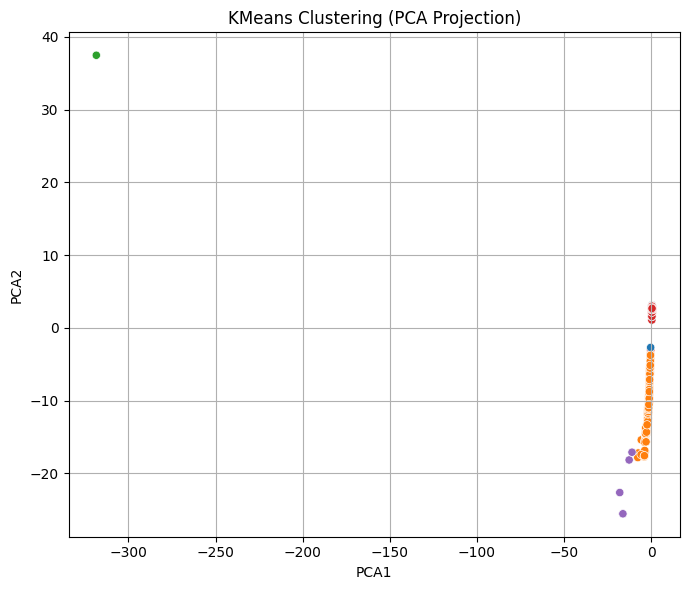

▶ Running DBSCAN...
✅ DBSCAN → Silhouette Score: -0.1338


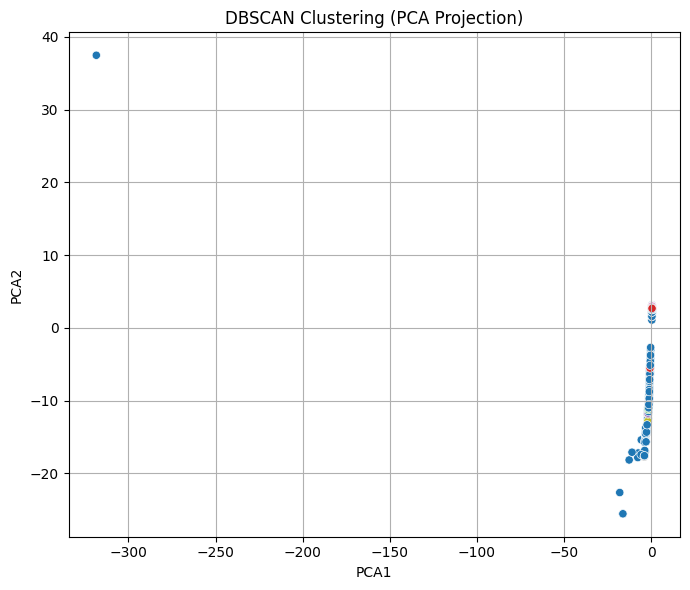

▶ Running Agglomerative...
✅ Agglomerative → Silhouette Score: 0.5405


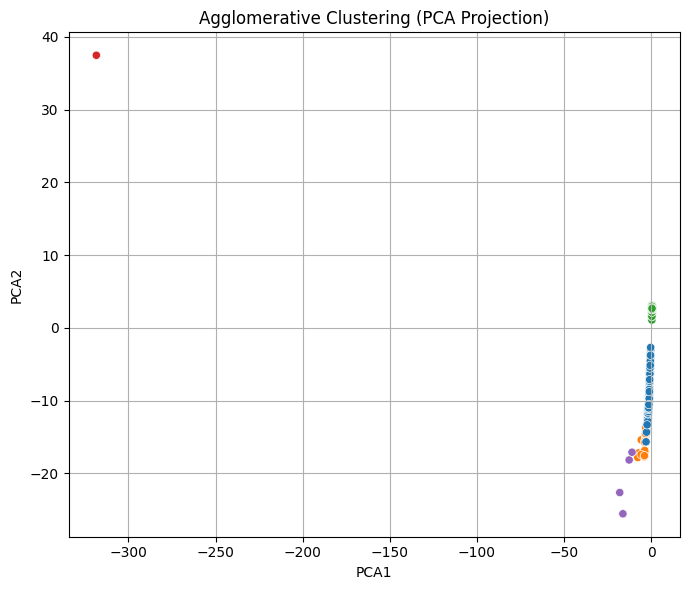

▶ Running GMM...
✅ GMM → Silhouette Score: 0.2963


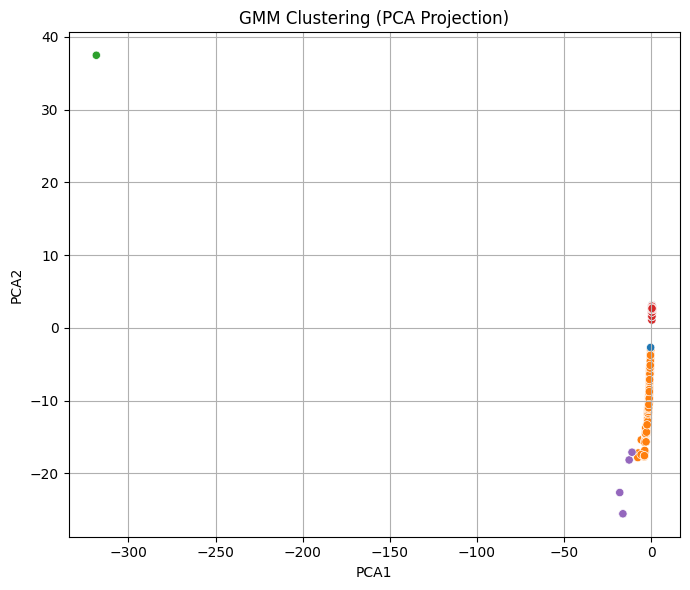

▶ Running HDBSCAN...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


✅ HDBSCAN → Silhouette Score: -0.0591


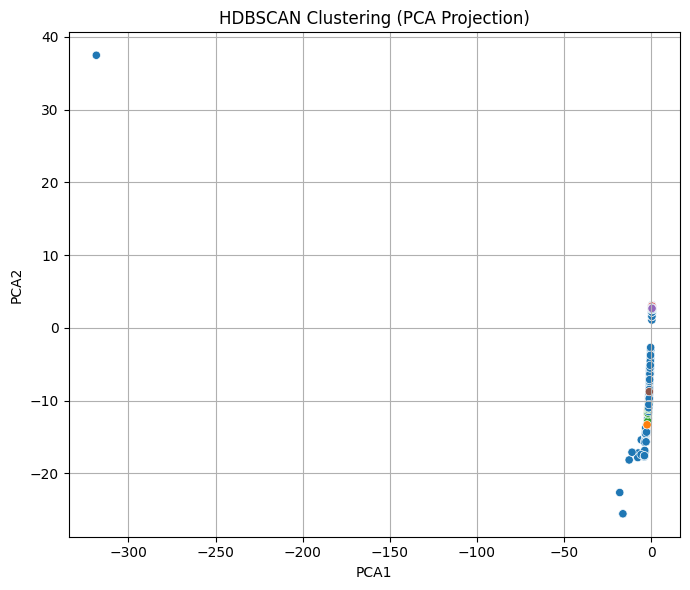


📊 Cluster Evaluation (model: KMeans)
🔸 Cluster 0: 158 samples | Top: CoinMiner (85) | Purity: 0.54
🔸 Cluster 1: 516 samples | Top: Adware (168) | Purity: 0.33
🔸 Cluster 2: 1 samples | Top: unknown (1) | Purity: 1.00
🔸 Cluster 3: 1804 samples | Top: Kryptik (226) | Purity: 0.13
🔸 Cluster 4: 5 samples | Top: Toolbar (2) | Purity: 0.40

💾 Exported: clustered_malware_dataset.csv

📈 Silhouette Score Summary:
KMeans          → 0.2951
DBSCAN          → -0.1338
Agglomerative   → 0.5405
GMM             → 0.2963
HDBSCAN         → -0.0591


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan

# Step 1: Load and match datasets
features_df = pd.read_csv("malware_features_datasetq.csv", low_memory=False)
features_df["filename"] = features_df["filename"].astype(str).str.replace(".txt", "", regex=False)

labels_df = pd.read_csv("family_labels.csv")
labels_df["filename"] = labels_df["filename"].astype(str).str.strip()

# Keep only labeled samples
filtered_df = pd.merge(features_df, labels_df, on="filename", how="inner")
print(f"✅ Matched {len(filtered_df)} labeled samples\n")

# Prepare X and keep metadata
X = filtered_df.drop(columns=["filename", "source", "family_name", "source_av"], errors="ignore")
meta_df = filtered_df[["filename", "family_name"]].copy()

# Fill NaNs
X = X.fillna("unknown")

# Encode object columns
for col in X.select_dtypes(include=["object"]).columns:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define clustering models
models = {
    "KMeans": KMeans(n_clusters=5, random_state=42),
    "DBSCAN": DBSCAN(eps=2.0, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=5),
    "GMM": GaussianMixture(n_components=5, random_state=42),
    "HDBSCAN": hdbscan.HDBSCAN(min_cluster_size=15)
}

results = {}

# Fit models
for name, model in models.items():
    print(f"▶ Running {name}...")
    if name == "GMM":
        clusters = model.fit_predict(X_scaled)
    else:
        clusters = model.fit(X_scaled).labels_
    score = silhouette_score(X_scaled, clusters) if len(set(clusters)) > 1 else -1
    results[name] = {"labels": clusters, "score": score}
    print(f"✅ {name} → Silhouette Score: {score:.4f}")

    # Plot clusters
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="tab10", legend=False)
    plt.title(f"{name} Clustering (PCA Projection)")
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Evaluate one model with real family labels
chosen_model = "KMeans"
meta_df["cluster"] = results[chosen_model]["labels"]

# Per-cluster purity
print(f"\n📊 Cluster Evaluation (model: {chosen_model})")
cluster_stats = []
for cid in sorted(meta_df["cluster"].unique()):
    subset = meta_df[meta_df["cluster"] == cid]
    count = len(subset)
    top_family = subset["family_name"].value_counts().idxmax()
    top_count = subset["family_name"].value_counts().max()
    purity = top_count / count if count > 0 else 0
    print(f"🔸 Cluster {cid}: {count} samples | Top: {top_family} ({top_count}) | Purity: {purity:.2f}")
    cluster_stats.append({
        "Cluster": cid,
        "Samples": count,
        "TopFamily": top_family,
        "Purity": round(purity, 2)
    })

# Export dataset with cluster labels
output_df = pd.concat([filtered_df, pd.Series(results[chosen_model]["labels"], name="cluster")], axis=1)
output_df.to_csv("clustered_malware_dataset.csv", index=False)
print("\n💾 Exported: clustered_malware_dataset.csv")

# Print score summary
print("\n📈 Silhouette Score Summary:")
for name, res in results.items():
    print(f"{name:15s} → {res['score']:.4f}")


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Load dataset
print("🔹 Step 1: Loading feature dataset...")
df = pd.read_csv("malware_features_datasetq.csv", low_memory=False)
df["filename"] = df["filename"].astype(str).str.replace(".txt", "", regex=False)
print(f"✅ Loaded {df.shape[0]} rows and {df.shape[1]} columns")
print(df.head(2))

# Step 2: Load and merge family labels
print("\n🔹 Step 2: Loading and merging with family labels...")
labels_df = pd.read_csv("family_labels.csv")
labels_df["filename"] = labels_df["filename"].astype(str).str.strip()

df = pd.merge(df, labels_df[["filename", "family_name"]], on="filename", how="inner")
print(f"✅ After merge: {df.shape[0]} rows")
print("🎯 Sample family names:\n", df["family_name"].value_counts().head())

# Step 3: Drop unused columns
print("\n🔹 Step 3: Dropping unnecessary columns...")
columns_to_drop = ["filename", "source", "source_av"]
df.drop(columns=columns_to_drop, inplace=True, errors="ignore")
print(f"✅ Columns now: {df.columns.tolist()[:5]}... (+{len(df.columns)-5} more)")

# Step 4: Fill missing values
print("\n🔹 Step 4: Handling missing values...")
before_na = df.isnull().sum().sum()
df.fillna("unknown", inplace=True)
after_na = df.isnull().sum().sum()
print(f"✅ Filled missing values: {before_na - after_na} values replaced")

# Step 5: Encode categorical features
print("\n🔹 Step 5: Encoding categorical columns...")
object_cols = df.select_dtypes(include=["object"]).columns.tolist()
object_cols.remove("family_name")  # exclude label

for col in object_cols:
    print(f"  • Encoding {col}")
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Step 6: Split features and labels
print("\n🔹 Step 6: Splitting features and labels...")
X = df.drop(columns=["family_name"])
y = df["family_name"]
print(f"✅ Features shape: {X.shape}")
print(f"✅ Sample features:\n{X.head(1)}")
print(f"✅ Labels sample:\n{y.head(5)}")

# Step 7: Encode labels
print("\n🔹 Step 7: Encoding labels...")
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_
print(f"✅ Total classes: {len(class_names)}")
print(f"✅ Sample label mappings: {dict(zip(class_names[:5], y_encoded[:5]))}")

# Step 8: Normalize features
print("\n🔹 Step 8: Scaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"✅ Normalized features shape: {X_scaled.shape}")
print(f"✅ First row (scaled):\n{X_scaled[0]}")


🔹 Step 1: Loading feature dataset...
✅ Loaded 129944 rows and 151 columns
  source                                           filename  EntryPoint  \
0   out1  000054e0b7668fe5501e3f6e9419e70d90733d5c33b509...       52080   
1   out1  0004024788c23eafde6dbcc9da8aaa90c50a8137678ba3...       11439   

   FromBegin  FromEnd                                        EntryHash10  \
0      52080  1756319  5c06f50018c1a97a50a682ed5dd36ba71f37379dab4fa6...   
1      11439  4535922  165e9d02f19660b445704f253df3801a64cd01237a0ebe...   

                                         EntryHash20  \
0  9b0d62c0b481c8bb6e2b46b9bd10acddf6be0c9e3586c6...   
1  0849a1cb5e6418fe5bb435fc7a5c6de38a974708d4ec0f...   

                                         EntryHash30  \
0  d255ff0254054ea4022614d17acc5953f9c42867ae0de1...   
1  18b153300a238cf3ce4385784c88f2cb1a43ec70b99ab0...   

                                         EntryHash40  Characteristics  ...  \
0  49e68d3f090b3dae5277079576b599510c7afc02fb8221...   

<ipython-input-13-8a90f7da067d>:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("unknown", inplace=True)


✅ Features shape: (2484, 149)
✅ Sample features:
   EntryPoint  FromBegin  FromEnd  EntryHash10  EntryHash20  EntryHash30  \
0       14069      14069   270603          619           83          645   

   EntryHash40  Characteristics  IsDLL  LARGE_ADDRESS_AWARE  ...  \
0         1098                6      0                    0  ...   

   SectionName_22  SectionVA_22  SectionVSIZE_22  SectionRawSize_22  \
0               0             0                0                  0   

   SectionCharacteristics_22  SectionName_23  SectionVA_23  SectionVSIZE_23  \
0                          0               0             0                0   

   SectionRawSize_23  SectionCharacteristics_23  
0                  0                          0  

[1 rows x 149 columns]
✅ Labels sample:
0    Kryptik
1        Spy
2    Kryptik
3    unknown
4    unknown
Name: family_name, dtype: object

🔹 Step 7: Encoding labels...
✅ Total classes: 180
✅ Sample label mappings: {'2345': np.int64(92), 'AHK': np.int64(147),

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         9,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,713 (45.75 KB)

 Trainable params: 11,713 (45.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8361 - loss: 0.4542 - val_accuracy: 0.9698 - val_loss: 0.1232
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9479 - loss: 0.2171 - val_accuracy: 0.9749 - val_loss: 0.1136
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9382 - loss: 0.2254 - val_accuracy: 0.9749 - val_loss: 0.1169
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9415 - loss: 0.2199 - val_accuracy: 0.9749 - val_loss: 0.1138
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9501 - loss: 0.1928 - val_accuracy: 0.9749 - val_loss: 0.1160
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9373 - loss: 0.2138 - val_accuracy: 0.9749 - val_loss: 0.1125
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9436 - loss: 0.1955 - val_accuracy: 0.9749 - val_loss: 0.1152
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9441 - loss: 0.2009 - val_accuracy: 0.9749 - val_loss

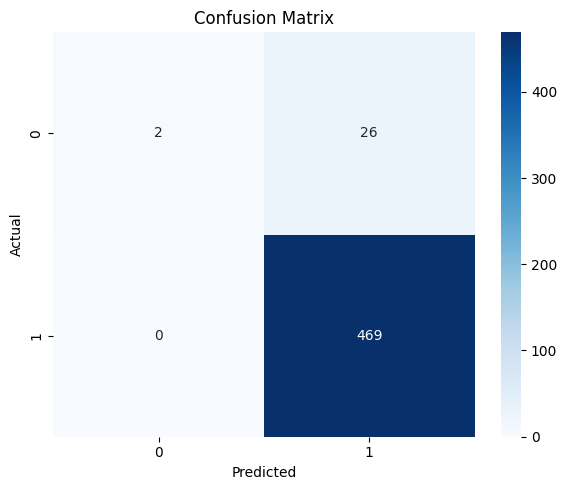

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


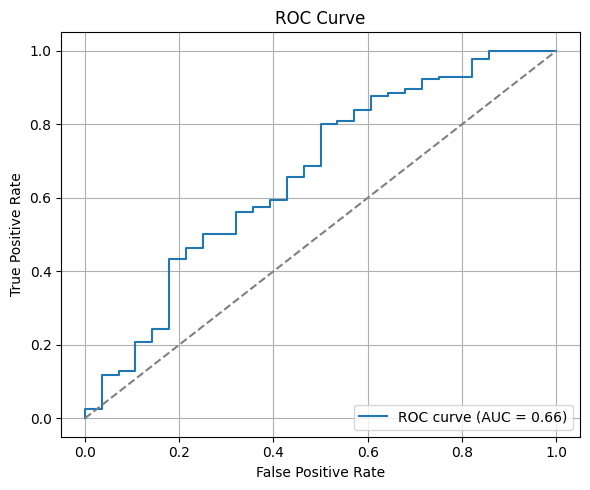

In [17]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Step 1: Binary label
binary_labels = df["family_name"].apply(lambda x: 0 if x.lower() == "unknown" else 1)

# Step 2: Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, binary_labels, test_size=0.2, random_state=42, stratify=binary_labels)

# Step 3: Build binary classifier
binary_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
binary_model.summary()

# Step 4: Train
binary_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1)

# Step 5: Evaluate
loss, acc = binary_model.evaluate(X_test, y_test)
print(f"✅ Binary Test Accuracy: {acc:.4f}")

# Optional: Classification report
y_pred = (binary_model.predict(X_test) > 0.5).astype(int)
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))
# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ✅ ROC Curve & AUC
y_pred_prob = binary_model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
